In [178]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [179]:
def plot_gallery(images):
  #Affiche les 12 premières images contenues dans images
  #images est de taille Nb image*Ny*Nx

  plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.show() 

In [180]:
#Load the data
[X, y, name]=np.load("TP1.npy",allow_pickle=True)

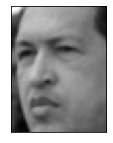

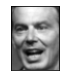

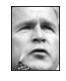

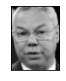

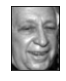

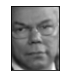

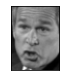

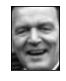

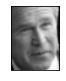

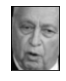

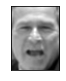

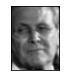

In [181]:
plot_gallery(X)

In [182]:
np.shape(y)

(1288,)

In [183]:
X.shape

(1288, 62, 47)

In [184]:
name[y[0:12]]

array(['Hugo Chavez', 'Tony Blair', 'George W Bush', 'Colin Powell',
       'Ariel Sharon', 'Colin Powell', 'George W Bush',
       'Gerhard Schroeder', 'George W Bush', 'Ariel Sharon',
       'George W Bush', 'Donald Rumsfeld'], dtype='<U17')

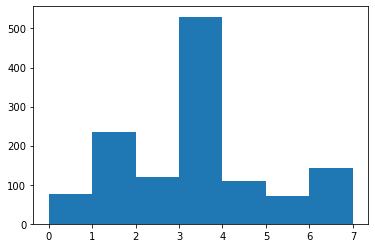

In [185]:
plt.figure()
h = plt.hist(y, bins = 7, range=(0,7))


Les classes ne sont pas équiprobables, car le nombre d'occurences des 7 classes n'est le mème.

In [186]:
#Partitionnement de la base de donnée:
x_train, x_test,y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 42)


In [187]:
# Prétraitement des données
# 1. Redimensionnement des données
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

In [188]:
x_train.shape
x_test.shape

(322, 2914)

In [189]:
# 2. Mise en forme
scaler = StandardScaler()
# calcul des moyennes et std
scaler.fit(x_train)
# Changement de repere par rapport à la moyenne de x_train (pour avoir la meme base)
# soustraire la moyenne et diviser par l'ecart type
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

array([1.        , 1.00000001, 1.00000001, ..., 1.        , 1.        ,
       1.        ])

In [190]:
# Classification KNN
# 1. classifieur 1PPV
classifieur1PPV = KNN(n_neighbors=1, p=2)
classifieur1PPV.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [191]:
score = classifieur1PPV.score(x_test, y_test)
print('Score: ',score*100)

Score:  0.577639751552795


In [192]:
y_pred = classifieur1PPV.predict(x_test)
# Matrice de confusion
m = confusion_matrix(y_test,y_pred)


In [197]:
print(m)
# Taux de reconnaissance ( accuracy)
taux = np.sum(np.diag(m))/(np.sum(m))*&àà
taux



[[  5   1   0   4   2   1   0]
 [  2  31   4  12   4   3   4]
 [  3   5  15   4   0   0   0]
 [  2   5   9 102   6   7  15]
 [  1   2   3   5   9   1   4]
 [  0   1   0   4   2   8   0]
 [  1   3   2  10   2   2  16]]


0.577639751552795

In [203]:
# Classification KNN
# 4. classifieur KPPV
print("Distance de EUclidienne:")
for k in range (1,10,1):
    classifieurKPPV = KNN(n_neighbors=k, p=2)
    classifieurKPPV.fit(x_train, y_train)
    score = classifieurKPPV.score(x_test, y_test)
    print(f'Score = {score*100}%, \t k = {k}')

Score = 57.7639751552795, 	 k = 1
Score = 56.52173913043478, 	 k = 2
Score = 59.62732919254658, 	 k = 3
Score = 63.66459627329193, 	 k = 4
Score = 62.732919254658384, 	 k = 5
Score = 64.28571428571429, 	 k = 6
Score = 61.80124223602485, 	 k = 7
Score = 61.80124223602485, 	 k = 8
Score = 61.80124223602485, 	 k = 9


In [206]:
print("Distance de Manhattan:")
for k in range (1,10,1):
    classifieurKPPV = KNN(n_neighbors=k, p=1)
    classifieurKPPV.fit(x_train, y_train)
    score = classifieurKPPV.score(x_test, y_test)
    print(f'Score = {score*100}%, \t k = {k}')

Distance de Manhattan:
Score = 59.93788819875776, 	 k = 1
Score = 59.3167701863354, 	 k = 2
Score = 64.90683229813664, 	 k = 3
Score = 65.527950310559, 	 k = 4
Score = 66.45962732919256, 	 k = 5
Score = 65.21739130434783, 	 k = 6
Score = 65.83850931677019, 	 k = 7
Score = 63.35403726708074, 	 k = 8
Score = 64.90683229813664, 	 k = 9
